# Первая часть. Исследование.

Team_Name на Kagle - Арсений_Выборнов; telegram - arvyb

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
# from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Проверка типов данных, полученных при преобразовании в DataFrame

In [4]:
# Случайный записи из датасета
data.sample(7, random_state=42)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1448,9,45.40,418.8,Male,0,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4792,37,70.35,2552.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
3964,44,100.10,4378.35,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
240,25,20.95,495.15,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0
1942,39,50.75,2011.4,Female,0,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
1859,52,79.20,4016.3,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,0


In [5]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

Можно заметить, что колонка TotalSpent в DataFrame типа object, хотя она явно должна быть float, видимо, там встречаются пропуски, приведём к типу float, а пропуски заменим NaN средствами pandas

In [6]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')

In [7]:
# Проверка на наличие NaN в данных
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Получилось 9 пропусков, заполним нулями

In [8]:
# median = data['TotalSpent'].median()
data['TotalSpent'] = data['TotalSpent'].fillna(0)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Построение диаграм, визуализация данных

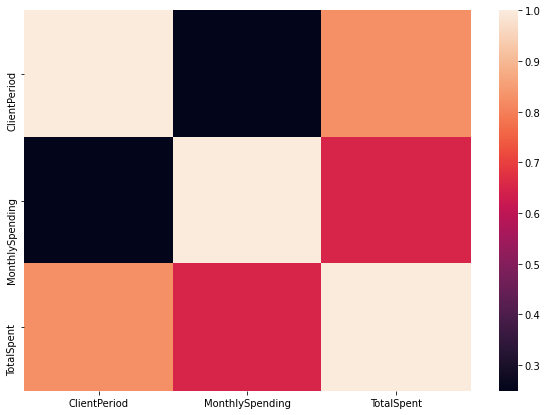

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(data[num_cols].corr())

In [10]:
for i in data[cat_cols].columns:
  print(data[i].value_counts())
  print("____________________")

Male      2655
Female    2627
Name: Sex, dtype: int64
____________________
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
____________________
No     2705
Yes    2577
Name: HasPartner, dtype: int64
____________________
No     3676
Yes    1606
Name: HasChild, dtype: int64
____________________
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
____________________
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
____________________
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
____________________
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64
____________________
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64
____________________
No                     2317
Yes                    1824
No interne

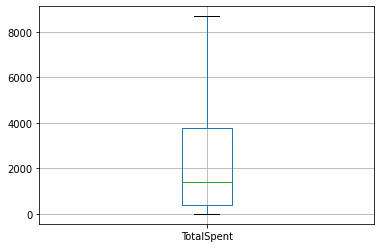

In [11]:
data.boxplot(column=['TotalSpent'])

Самые несбалансированные параметры это IsSeniorCitizen, HasPhoneService, HasMultiplePhoneNumbers и TotalSpent

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

One-Hot кодирование и нормирование

In [13]:
scaler = StandardScaler()
categ_data = data[cat_cols]
data_num = pd.DataFrame(data = scaler.fit_transform(data.iloc[:,0:3]), columns=num_cols)
data_dum = pd.get_dummies(categ_data)
data_fin = pd.concat([data_num, data_dum], axis=1)
data_fin

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.555852,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,1.613288,-1.294998,-0.183039,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,-1.279005,0.363737,-0.974768,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,-0.016173,0.476418,0.124519,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,1.124450,1.667856,1.970599,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-1.197532,-1.144204,-0.972013,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
5278,0.717084,-0.678565,-0.043651,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0
5279,-1.279005,-0.327265,-0.983957,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
5280,-0.138382,0.367051,-0.031838,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


Разделение данных на тренировочную и тестовую выборки 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data_fin.values, data['Churn'].values, train_size=0.81, random_state=42)

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve

In [16]:
def plot_roc_curve(model, X_train, X_test, y_train, y_test):
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    plt.figure(figsize=(12,10))

    print(f'Train roc-auc: {roc_auc_score(y_train, y_train_proba)}')
    print(f'Test roc-auc: {roc_auc_score(y_test, y_test_proba)}')


    plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
    plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test roc-curve')

    plt.plot([0,1], [0,1], linestyle='--', color='black')
    plt.grid(True)
    plt.legend()
    plt.show()

Подбор параметров для LogisticRegression

Fitting 5 folds for each of 490 candidates, totalling 2450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 2112 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2450 out of 2450 | elapsed:  1.2min finished


Train roc-auc: 0.8546525395385068
Test roc-auc: 0.8226821986046008


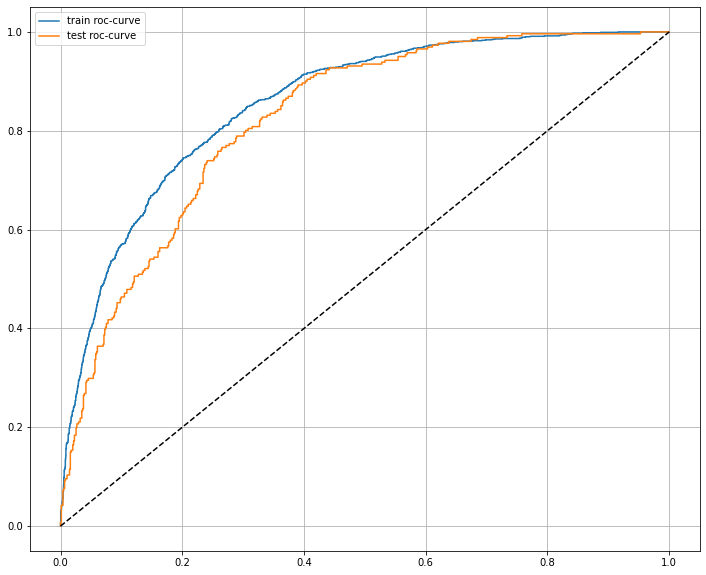

In [17]:
Cs = [7, 6, 10, 8, 5, 3, 4]
penal = ['l2', 'elasticnet']
toler = [0.0011, 0.001, 0.005, 0.00099, 0.0013, 1, 10]
solv = ['lbfgs','liblinear','saga', 'newton-cg', 'sag']
verb = [1, 3, 5, 7]

_clf = LogisticRegression()
gs = GridSearchCV(
    _clf,
    param_grid={'C': Cs, 'penalty': penal,
                'tol': toler, 'solver': solv},
    cv=5,                 
    scoring='neg_log_loss',
    n_jobs=-1,
    verbose=3,
    refit=True)
search_cv = gs.fit(X_train, y_train)
plot_roc_curve(search_cv, X_train, X_test, y_train, y_test)

Выведем подобранные параметры

In [18]:
search_cv.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0011}

Загрузка тестовых данных, обработка

In [19]:
test_data = pd.read_csv('./test.csv')

In [20]:
test_data['TotalSpent'] = pd.to_numeric(test_data['TotalSpent'], errors='coerce')
test_data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  2
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

Замена NaN

In [21]:
# median_test = test_data['TotalSpent'].median()
test_data['TotalSpent'] = test_data['TotalSpent'].fillna(0)

One-Hot кодирование и нормирование тестовых данных

In [22]:
scaler = StandardScaler()
test_categ_data = test_data[cat_cols]
test_data_num = pd.DataFrame(data = scaler.fit_transform(test_data.iloc[:,0:3]), columns=num_cols)
test_data_dum = pd.get_dummies(test_categ_data)
test_data_fin = pd.concat([test_data_num, test_data_dum], axis=1)
test_data_fin

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.394782,-0.274027,0.057688,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
1,-0.133958,1.147644,0.330847,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
2,-0.947404,0.401602,-0.695456,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,1.411590,0.326160,1.155787,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0
4,1.574279,-1.481107,-0.383600,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,1.574279,1.370619,2.344622,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0
1757,-0.784715,-1.455959,-0.877989,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1
1758,-1.232110,0.911258,-0.922638,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
1759,-0.540681,0.832463,-0.281293,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0


Предсказание на тестовой выборке и выгрузка ответов

In [23]:
test_predicts = search_cv.predict(test_data_fin.to_numpy())

In [24]:
pred_dict = {'Id': np.arange(1761),'Churn': test_predicts}
pred_test_data = pd.DataFrame(pred_dict)
pred_test_data

,Id,Churn
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0
...,...,...
1756,1756,0
1757,1757,0
1758,1758,1
1759,1759,1


In [25]:
pred_test_data.to_csv('./my_submission.csv', index=False)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

На Kagle LogisticRegression выдал 0.72749

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [26]:
import xgboost
from sklearn.model_selection import GridSearchCV

In [27]:
def search(X, y, model, param_name, grid, draw=True):
    parameters = {param_name: grid}
    
    CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='roc_auc', n_jobs=-1)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    
    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        plt.plot(grid, means, label='mean values of score')

        plt.fill_between(grid, means - 2 * error, means + 2 * error, color='green', label='deviation area between errors')
        plt.legend()
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()
        
    return means, error

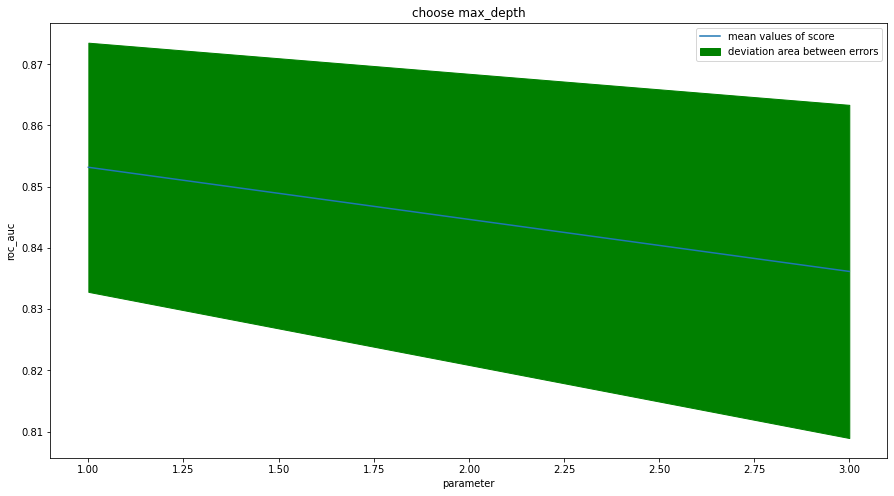

In [28]:
models = [xgboost.XGBClassifier(n_estimators=337)]
param_names = ['max_depth']
grids = [np.arange(1,5,2)]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search(X_train, y_train, model, param_name, grid, param_scale)

Train roc-auc: 0.8627119457306033
Test roc-auc: 0.8243297597500038


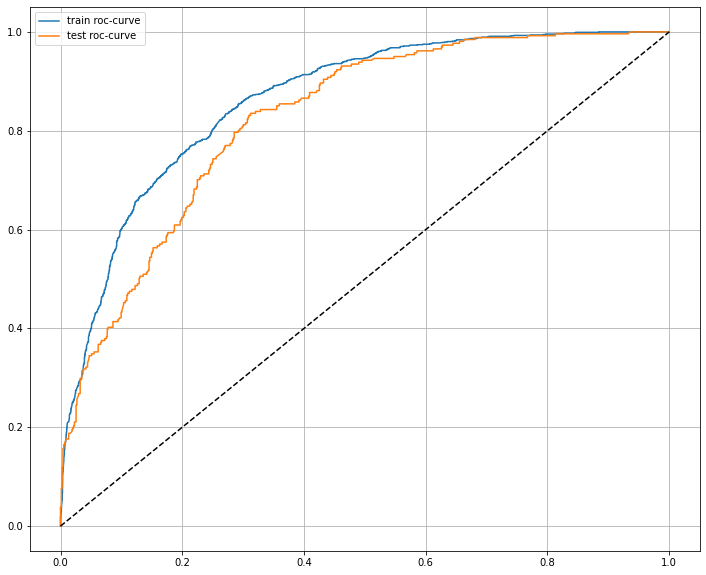

In [29]:
model_boost = xgboost.XGBClassifier(max_depth=1, n_estimators=250).fit(X_train, y_train)
plot_roc_curve(model_boost, X_train, X_test, y_train, y_test)

In [30]:
test_predicts = model_boost.predict(test_data_fin.to_numpy())
pred_dict = {'Id': np.arange(1761),'Churn': test_predicts}
pred_test_data = pd.DataFrame(pred_dict)

Выгрузка данных

In [31]:
pred_test_data.to_csv('./my_submission.csv', index=False)

#CatBoost

In [32]:
!pip install catboost

In [33]:
import catboost

In [50]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(data.iloc[:,:-1].values, data['Churn'].values, train_size=0.71, random_state=8)

In [51]:
X_train_b = pd.DataFrame(data = X_train_b, columns=data.iloc[:,:-1].columns)
X_test_b = pd.DataFrame(data = X_test_b, columns=data.iloc[:,:-1].columns)
y_train_b = pd.DataFrame({'Churn': y_train_b})
y_test_b = pd.DataFrame({'Churn': y_test_b})

In [52]:
catb_model = catboost.CatBoostClassifier(
    iterations=350, 
    cat_features=data.iloc[:,:-1].columns[3:],
    learning_rate=0.03,
    bagging_temperature=0,
    custom_loss=['AUC'],
    use_best_model=True,
    metric_period=25,
    random_seed=42)
catb_model.fit(
    X_train_b, y_train_b,
    eval_set=(X_test_b, y_test_b))

y_train_pred = catb_model.predict_proba(X_train_b)[:, 1]
y_test_pred = catb_model.predict_proba(X_test_b)[:, 1]

0:	learn: 0.6743108	test: 0.6737876	best: 0.6737876 (0)	total: 13.9ms	remaining: 4.86s
25:	learn: 0.4615652	test: 0.4583360	best: 0.4583360 (25)	total: 361ms	remaining: 4.5s
50:	learn: 0.4207277	test: 0.4221076	best: 0.4221076 (50)	total: 674ms	remaining: 3.95s
75:	learn: 0.4071898	test: 0.4122436	best: 0.4122436 (75)	total: 967ms	remaining: 3.48s
100:	learn: 0.3993482	test: 0.4080863	best: 0.4080863 (100)	total: 1.29s	remaining: 3.18s
125:	learn: 0.3934822	test: 0.4061307	best: 0.4061307 (125)	total: 1.61s	remaining: 2.86s
150:	learn: 0.3890726	test: 0.4055943	best: 0.4055943 (150)	total: 1.9s	remaining: 2.5s
175:	learn: 0.3848929	test: 0.4045451	best: 0.4045451 (175)	total: 2.2s	remaining: 2.18s
200:	learn: 0.3820165	test: 0.4038393	best: 0.4038393 (200)	total: 2.5s	remaining: 1.85s
225:	learn: 0.3782008	test: 0.4032513	best: 0.4032513 (225)	total: 2.83s	remaining: 1.55s
250:	learn: 0.3741775	test: 0.4028043	best: 0.4028043 (250)	total: 3.2s	remaining: 1.26s
275:	learn: 0.3693490	tes

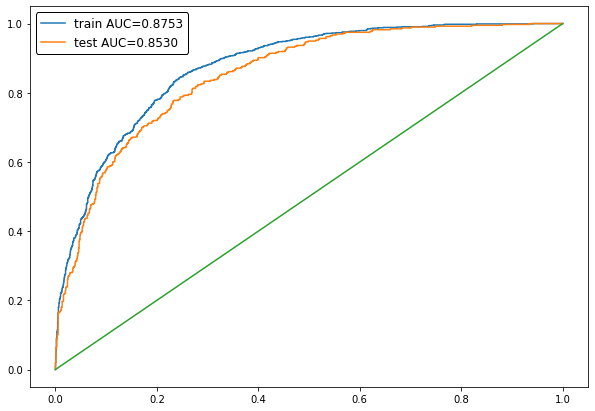

In [53]:
train_auc = roc_auc_score(y_train_b, y_train_pred)
test_auc = roc_auc_score(y_test_b, y_test_pred)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train_b, y_train_pred)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test_b, y_test_pred)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [54]:
test_predicts = catb_model.predict(test_data)

In [55]:
pred_dict = {'Id': np.arange(1761),'Churn': test_predicts}
pred_test_data = pd.DataFrame(pred_dict)
pred_test_data.to_csv('./my_submission.csv', index=False)

Максимальное качество CatBoost на Kagle 0.73225 